## 1. IMPORT DES BIBLIOTHÈQUES

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

## 2. DATASET

In [7]:
(X, y), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [8]:
print(X.shape) #shape of the Data
print(X[0][:]) #print the features of the the 1st sample

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [34]:
print(y[0]) #print the number represented in the 1st sample (ground truth)
print(np.unique(y)) #print the list of possible classes

5
[0 1 2 3 4 5 6 7 8 9]


# 3. Visualisation

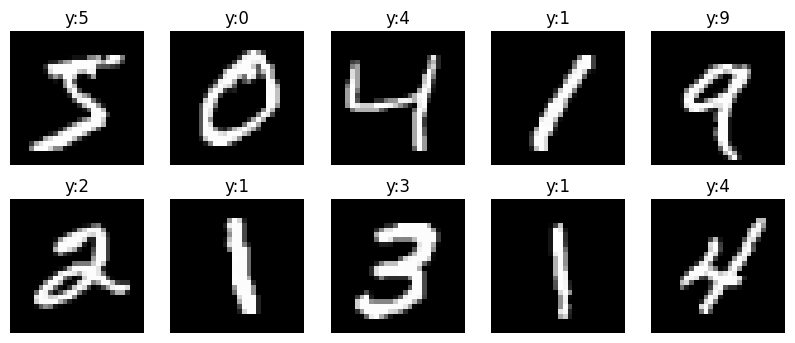

In [9]:
fig, axes = plt.subplots(2,5, figsize=(10,4))

for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28,28), cmap="gray")
    ax.set_title(f"y:{y[i]}")
    ax.axis("off")

plt.show()

## 4. Data preparation & split

In [10]:
# Normalisation
X = X / 255.0
X_test = X_test / 255.0

# Flatten images 28x28 → 784
X = X.reshape(-1, 784)
# X.reshape(60000, 784) # it's the same
X_test = X_test.reshape(-1, 784)
# X_test = X_test.reshape(10000, 784) # it's the same

# Split train/validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# 5. Fully Connected Neural network

In [ ]:
# Architecture
input_shape = 784 #TODO: replace with the size of the input
activation_funct = "relu" #TODO: activation function
model = keras.Sequential([
    keras.layers.Dense(128, activation=activation_funct, input_shape=(input_shape,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
    #TODO: ajouter output layer (softmax)
]) # change the architecture to see the impact on the model


# Compilation
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # replace with SGD(learning_rate=0.01, momentum=0.9), Adagrad
    loss="sparse_categorical_crossentropy", #TODO: try 2 loss functions
    metrics=["accuracy"],
)

model.summary()

c:\Users\Samy\Desktop\TP_Réseaux_Neurones\env_tp2\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Training
history = model.fit(
    X_train,
    y_train,
    epochs=10,  #TODO: try other values & observe the impact
    batch_size=64, #TODO: try other values & observe the impact
    validation_data=(X_val, y_val)
)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.9141 - loss: 0.2983 - val_accuracy: 0.9535 - val_loss: 0.1523
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9633 - loss: 0.1226 - val_accuracy: 0.9660 - val_loss: 0.1203
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9743 - loss: 0.0846 - val_accuracy: 0.9727 - val_loss: 0.0873
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9800 - loss: 0.0640 - val_accuracy: 0.9753 - val_loss: 0.0835
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9847 - loss: 0.0506 - val_accuracy: 0.9738 - val_loss: 0.0861
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9772 - val_loss: 0.0766
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9900 - loss: 0.0322 - val_accuracy: 0.9800 - val_loss: 0.0739
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9913 - loss: 0.0284 - val_accuracy: 0

In [13]:
# prediction
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


# Metrics & Evaluation

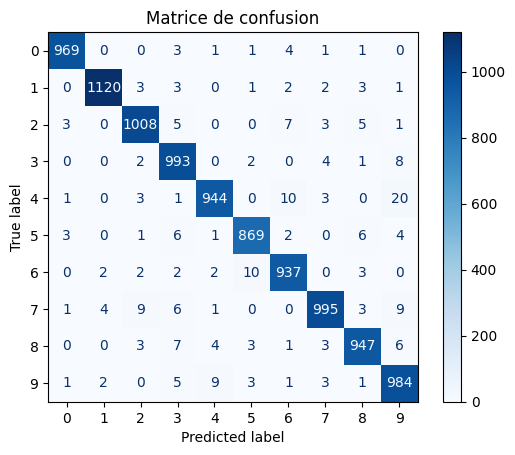


Classification Report :

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.97      0.98       892
           6       0.97      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.98      0.97      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


Accuracy : 0.9766


In [14]:
# Confusion Matrix 
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matrice de confusion")
plt.show()

# Precision / Recall / F1 
print("\nClassification Report :\n")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy :", accuracy)

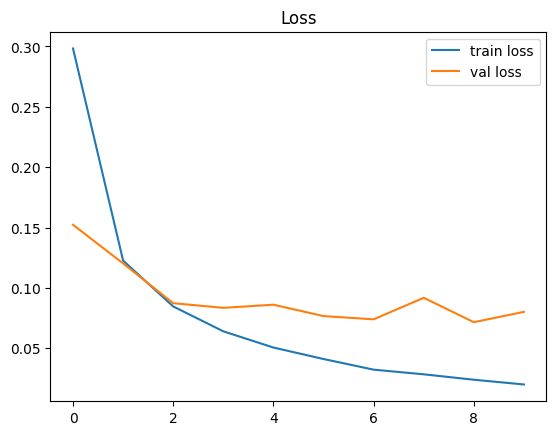

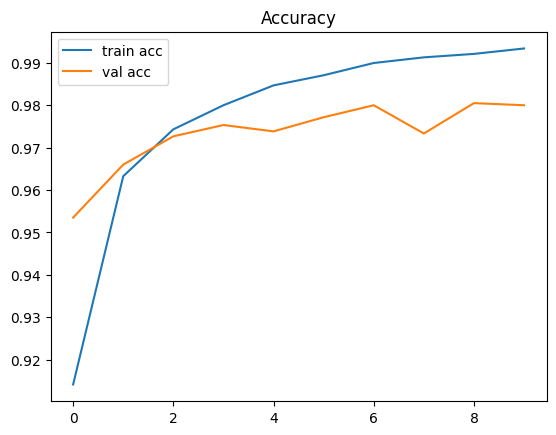

In [15]:
# Learning plots
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.legend()
plt.title("Accuracy")
plt.show()

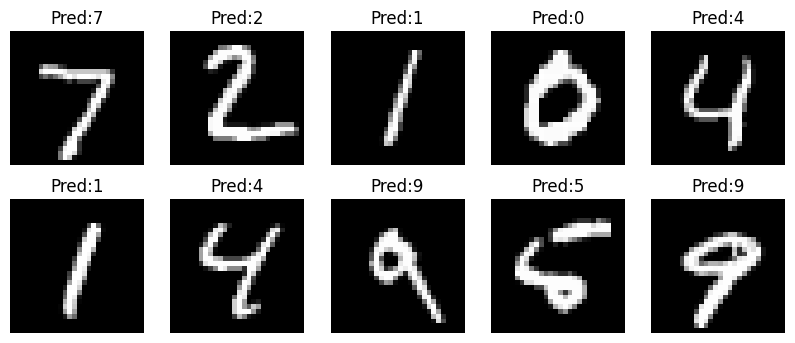

In [16]:
fig, axes = plt.subplots(2,5, figsize=(10,4))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(28,28), cmap="gray")
    ax.set_title(f"Pred:{y_pred[i]}")
    ax.axis("off")

plt.show()